This notebook shows that you can execute multiple circuits together with the execute command and QuaC backends. Two identical circuits are run and their results plotted.

In [14]:
import math
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.quac import Quac

In [15]:
circuit = QuantumCircuit(2, 2)
circuit.u2(0, math.pi, 0)
circuit.cx(0, 1)

circuit2 = QuantumCircuit(2, 2)
circuit2.h(0)
circuit2.cx(0, 1)

circuit.draw()

┌──────────┐     
q_0: ┤ U2(0,pi) ├──■──
     └──────────┘┌─┴─┐
q_1: ────────────┤ X ├
                 └───┘
c_0: ═════════════════
                      
c_1: ═════════════════

In [16]:
circuit2.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c_0: ══════════
               
c_1: ══════════

In [17]:
# Define Lindblad emission and dephasing terms
lindblad = {
    "0": {
        "T1": 1000,
        "T2": 50000
    },
    "1": {
        "T1": 1000,
        "T2": 50000
    }
}

In [18]:
print("Available QuaC backends:")
backends = Quac.backends()
print(backends[1:5])
print("... and many more!")
simulator = Quac.get_backend('generic_counts_simulator')

Available QuaC backends:
[<QuacCountsSimulator('generic_counts_simulator') from QuacProvider()>, <QuacDensitySimulator('fake_armonk_density_simulator') from QuacProvider()>, <QuacCountsSimulator('fake_armonk_counts_simulator') from QuacProvider()>, <QuacDensitySimulator('fake_yorktown_density_simulator') from QuacProvider()>]
... and many more!


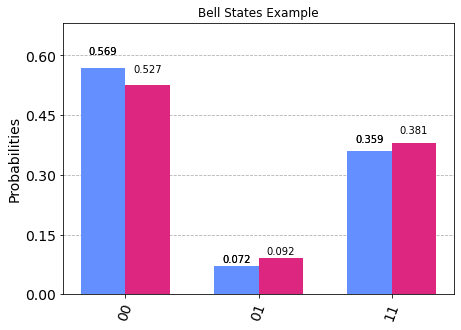

In [19]:
# Execute the circuit on the QuaC simulator
job = execute([circuit, circuit2], simulator, shots=1000, lindblad=lindblad)
plot_histogram(job.result().get_counts(), title="Bell States Example")